In [1]:
%run flow_tools.py

/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from matplotlib.path import Path
from matplotlib import patches

In [3]:
folders = ['/Users/weinberz/Library/CloudStorage/Box-Box/SynCellMotifs/Flow/20220523_mesc_SynNotch_ss39_ss35_ss37/']

In [16]:
df = pd.concat([load_data(folder, colnames = ["WellName", "Receiver", "Sender",'Replicate'])
               for folder in folders], ignore_index=True)

In [17]:
#remove NAs
df2= df.loc[(df.select_dtypes(include=['number']) > 0).all(axis='columns'), :]
df2=df2.dropna()

In [18]:
#define gate for FSC-A vs SSC-A
fsc_ssc_verts = [(4e4, 1e4),
              (1e5, 2.5e4),
              (2.5e5, 1e5),
              (2.5e5, 2.5e5),
              (1e5, 6e4),
              (4e4, 2e4),
              (4e4, 2e4),
              (4e4, 1e4)]
fsc_ssc_gate = Path(fsc_ssc_verts)

ssc_verts = [(0, 1e4),
              (2e5, 1.8e5),
              (2.6e5, 1.8e5),
              (2.5e5, 1.3e5),
              (1.25e5, 7.5e4),
              (1e4, 0),
              (0, 1e4)]
ssc_gate = Path(ssc_verts)

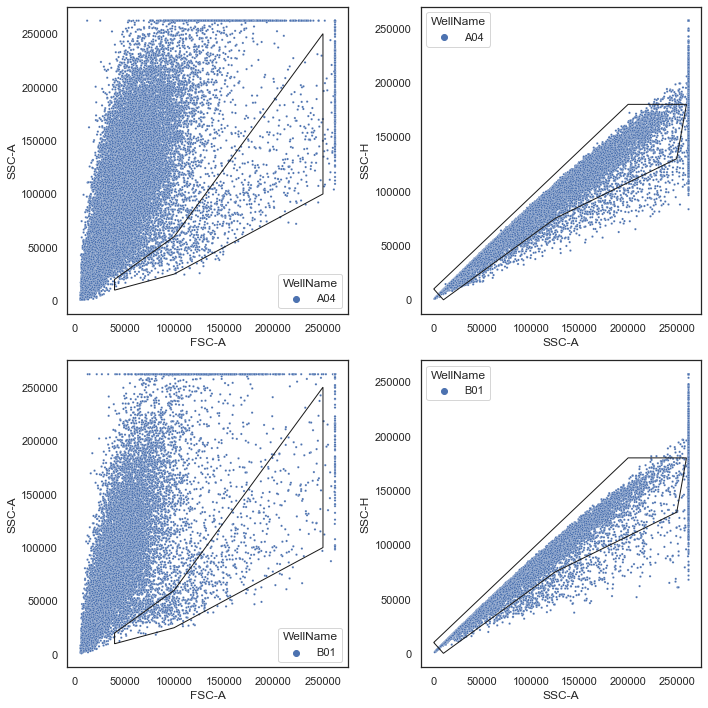

In [7]:
fig, axs = plt.subplots(2,2, figsize=[10,10])
sns.scatterplot(data=df2[(df2['WellName'].isin(['A04']))], x='FSC-A', y='SSC-A', marker='o', s=5, edgecolors=None, ax=axs[0,0], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['A04'])], x='SSC-A', y='SSC-H', marker='o', s=5, edgecolors=None, ax=axs[0,1], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['B01'])], x='FSC-A', y='SSC-A', marker='o', s=5, edgecolors=None, ax=axs[1,0], hue='WellName')
sns.scatterplot(data=df2[df2['WellName'].isin(['B01'])], x='SSC-A', y='SSC-H', marker='o', s=5, edgecolors=None, ax=axs[1,1], hue='WellName')
patch = patches.PathPatch(fsc_ssc_gate, facecolor="None", edgecolor='k')
axs[0,0].add_patch(patch)
patch = patches.PathPatch(fsc_ssc_gate, facecolor="None", edgecolor='k')
axs[1,0].add_patch(patch)
patch = patches.PathPatch(ssc_gate, facecolor="None", edgecolor='k')
axs[0,1].add_patch(patch)
patch = patches.PathPatch(ssc_gate, facecolor="None", edgecolor='k')
axs[1,1].add_patch(patch)
plt.tight_layout()

In [19]:
#filter to gate
df2 = df2[fsc_ssc_gate.contains_points(df2[['FSC-A','SSC-A']].to_numpy())]
df2 = df2[ssc_gate.contains_points(df2[['SSC-A', 'SSC-H']].to_numpy())]
# # gate on singlets
# df2 = gate_density(df2, 0.1, x_var='SSC-A',y_var='SSC-H')

for col in df2.columns:
        if df2[col].dtype=="float32":
            df2["log"+ col]=df2[col].apply(math.log10)

In [8]:
df2 = df2.replace({'ALFA-Notch':'NbALFA-Notch', 'ALFA-SNIPR':'NbALFA-SNIPR'})

In [9]:
expression_df = (df2[(df2['Sender']=='None')]
                 .groupby(['Receiver','Replicate'])['APC-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


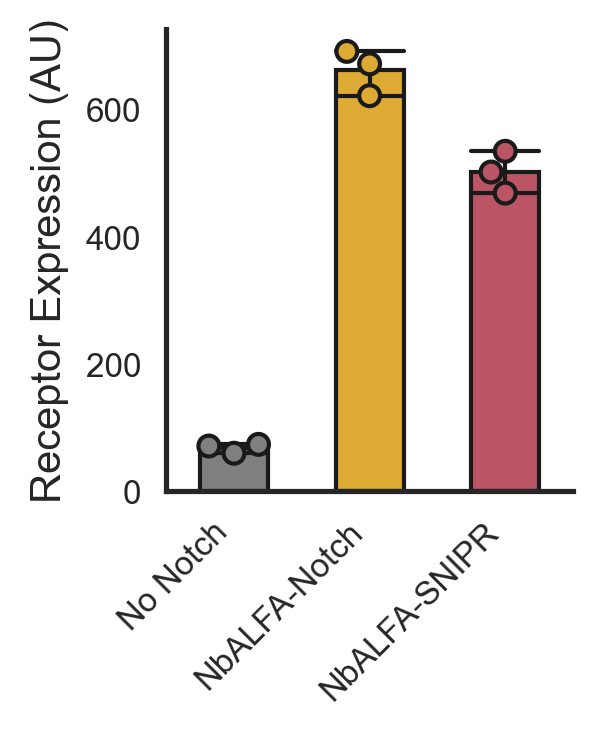

In [10]:
notches = ['No Notch','NbALFA-Notch','NbALFA-SNIPR']
with sns.color_palette(['gray', '#ddaa33', '#bb5566']):
    fig, ax = plt.subplots(1,1,figsize=(1.75,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Receiver', y='APC-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
                  edgecolor='k', linewidth=1, dodge=False, legend=False)
    sns.barplot(data=expression_df, x='Receiver', y='APC-A', hue='Receiver',
                  order=notches,
                  hue_order=notches, 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    #g.legend().remove()
    plt.legend(frameon=False)
    g.set_ylabel('Receptor Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'synnotch_expression.pdf', bbox_inches='tight')

In [42]:
expression_df = (df2[(df2['Receiver']=='None')]
                 .groupby(['Sender','Replicate'])['FITC-A']
                 .median()
                 .reset_index())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


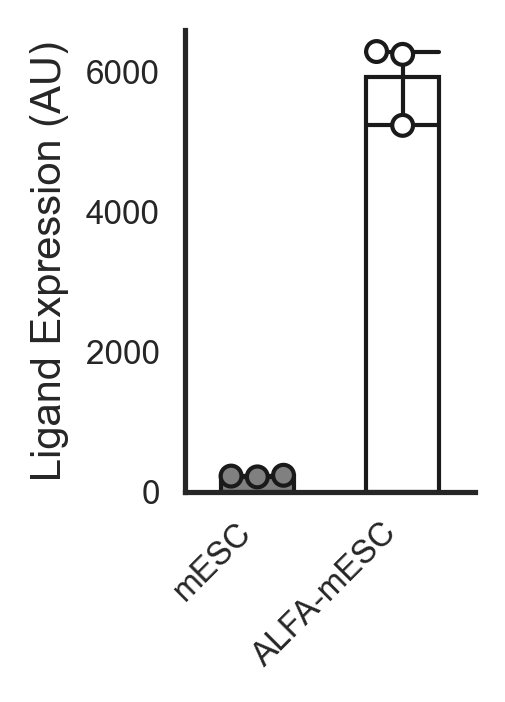

In [46]:
notches = ['mESC','ALFA-mESC']
with sns.color_palette(['gray', 'white']):
    fig, ax = plt.subplots(1,1,figsize=(1.25,2), dpi=300)
    g = sns.swarmplot(data=expression_df, x='Sender', y='FITC-A', hue='Sender',
                  order=notches,
                  hue_order=notches, 
                  edgecolor='k', linewidth=1, dodge=False, legend=False)
    sns.barplot(data=expression_df, x='Sender', y='FITC-A', hue='Sender',
                  order=notches,
                  hue_order=notches, 
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    #g.legend().remove()
    plt.legend(frameon=False)
    g.set_ylabel('Ligand Expression (AU)')
    g.set_xlabel('')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir+'ligand_expression.pdf', bbox_inches='tight')

Text(0.5, 22.959999999999972, 'log <channel>')

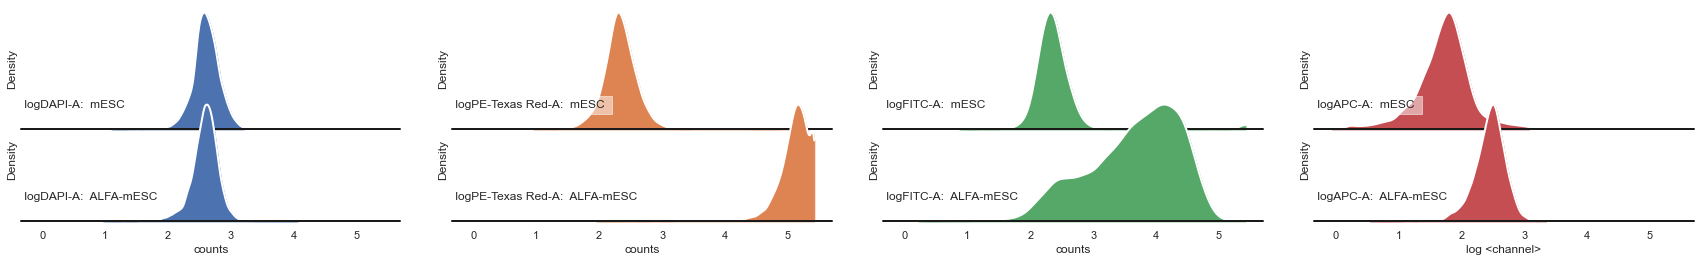

In [9]:
# To figure out what our cutoffs should be, let's look at the untransfected cells for all 4 channels:
# This plots each channel as a column of graphs, and each cell line per row
simplified_df = (df2.reset_index()
                 .melt(value_vars=['logDAPI-A','logPE-Texas Red-A','logFITC-A', 'logAPC-A'], 
                       id_vars=['index','WellName','Sender','Receiver'],
                       var_name='channel',
                       value_name='counts'))
g = sns.FacetGrid(data=simplified_df[(simplified_df["Receiver"].isin(['None']))], 
                  row = 'Sender', col='channel', hue='channel', sharey=False, aspect=3, height=2)
g.map(sns.kdeplot, "counts", shade=True, alpha=1, bw_adjust=0.9, clip_on=False, cut=0)
g.map(sns.kdeplot, "counts", color="w", lw=2, bw_adjust=.9, clip_on=False, cut=0)
g.map(plt.axhline, y=0, lw=2, color='k', clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

for ax in g.axes.flat:
    wellname = ax.get_title().split("=")[2]
    ch = ax.get_title().split('|')[0].split('=')[1]
    ax.text(0,0.2, "{}: {}".format(wellname, ch), ha="left", va="center", 
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set(facecolor=(0, 0, 0, 0))

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.xlabel("log <channel>")

Text(0.5, 22.959999999999958, 'log <channel>')

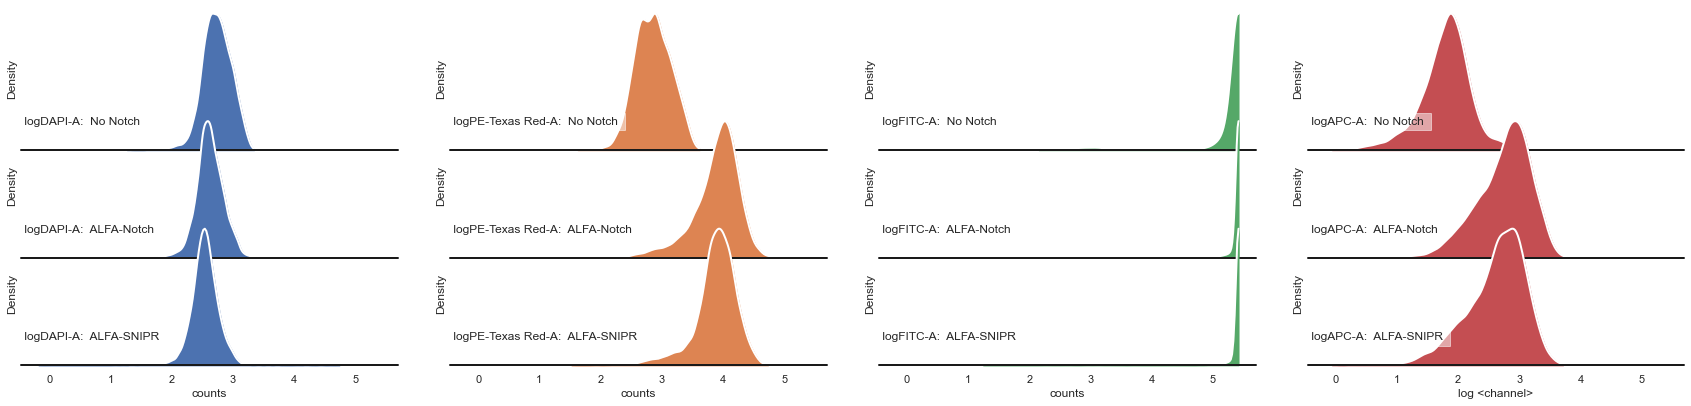

In [10]:
# To figure out what our cutoffs should be, let's look at the untransfected cells for all 4 channels:
# This plots each channel as a column of graphs, and each cell line per row
simplified_df = (df2.reset_index()
                 .melt(value_vars=['logDAPI-A','logPE-Texas Red-A','logFITC-A', 'logAPC-A'], 
                       id_vars=['index','WellName','Sender','Receiver'],
                       var_name='channel',
                       value_name='counts'))
g = sns.FacetGrid(data=simplified_df[(simplified_df["Sender"].isin(['None']))], 
                  row = 'Receiver', col='channel', hue='channel', sharey=False, aspect=3, height=2)
g.map(sns.kdeplot, "counts", shade=True, alpha=1, bw_adjust=0.9, clip_on=False, cut=0)
g.map(sns.kdeplot, "counts", color="w", lw=2, bw_adjust=.9, clip_on=False, cut=0)
g.map(plt.axhline, y=0, lw=2, color='k', clip_on=False)

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

for ax in g.axes.flat:
    wellname = ax.get_title().split("=")[2]
    ch = ax.get_title().split('|')[0].split('=')[1]
    ax.text(0,0.2, "{}: {}".format(wellname, ch), ha="left", va="center", 
            bbox=dict(facecolor='white', alpha=0.5), transform=ax.transAxes)
    ax.set(facecolor=(0, 0, 0, 0))

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.xlabel("log <channel>")

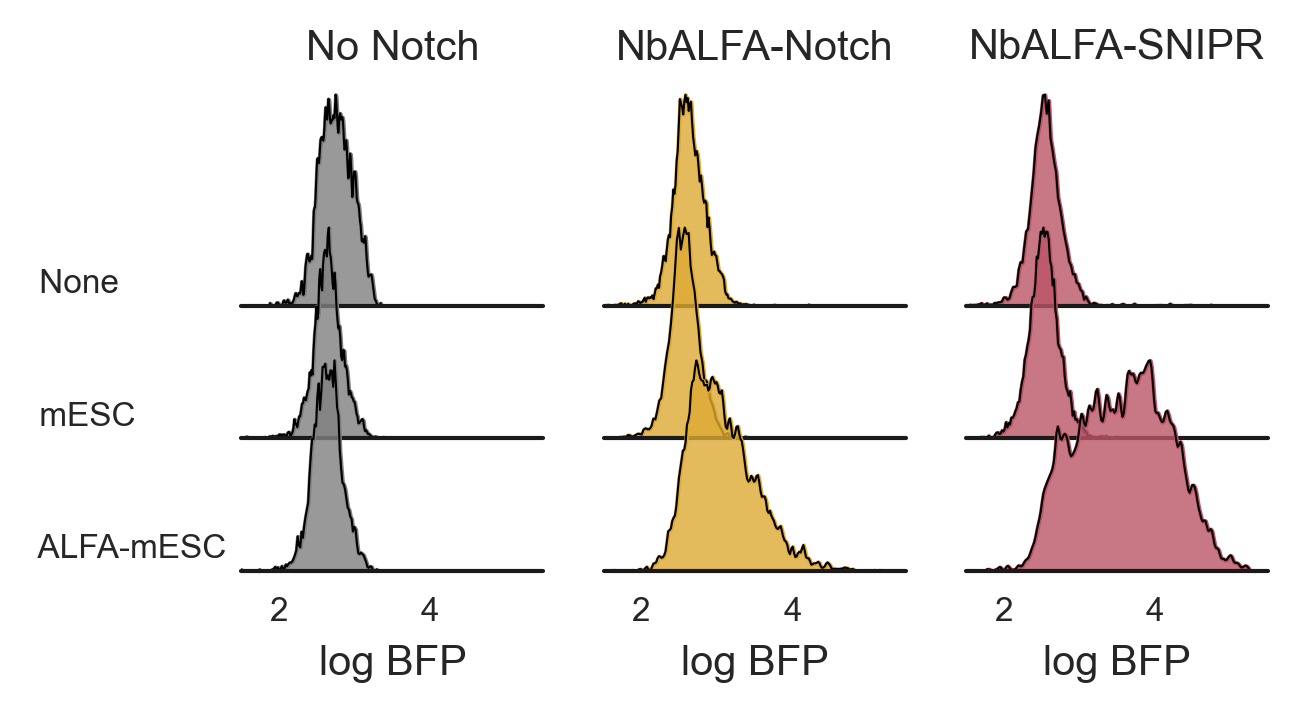

In [15]:
senders = ['None', 'mESC', 'ALFA-mESC']
notches = ['No Notch','NbALFA-Notch', 'NbALFA-SNIPR',]
with sns.color_palette(['gray', '#ddaa33', '#bb5566']):
    g = sns.FacetGrid(data=df2[(df2['Receiver'].isin(notches)) &
                               (df2['logFITC-A'] > 5)],
                      row='Sender', col='Receiver', sharey=False, aspect=1.7, height=0.8, 
                      hue='Receiver', row_order=senders, col_order=notches, hue_order=notches, xlim=[1.5, 5.5])
    g.map(sns.kdeplot, "logDAPI-A", fill=True, alpha=0.8, bw_adjust=0.2, cut=0)
    g.map(sns.kdeplot, "logDAPI-A", color="black", lw=0.5, bw_adjust=.2, cut=0)
    g.map(plt.axhline, y=0, lw=1, color='k', clip_on=False)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.4)
    g.fig.subplots_adjust(wspace=.2)

    left_axes = [g.facet_axis(r, 0) for r in range(len(senders))]
    for ax in left_axes:
        dose = ax.get_title().split("=")[1].split('|')[0]
        ax.text(-0.7,0.1, "{}".format(dose), ha="left", va="center", 
                bbox=dict(facecolor='white', alpha=0), transform=ax.transAxes)

    g.set_titles("")
    top_axes = [g.facet_axis(0,c) for c in range(len(notches))]
    for ax, notch in zip(top_axes, notches):
        ax.set_title(notch)
    [ax.set(facecolor=(0, 0, 0, 0)) for ax in g.axes.flat]

    # Remove axes details that don't play well with overlap
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.set_xlabels("log BFP")
    g.set_ylabels('')
    g.fig.set_dpi(300)
    plt.savefig(outputdir + 'figure_Notch_SNIPR_kdeplot.pdf', bbox_inches='tight')

In [12]:
filters = ((df2['logFITC-A'] > 5) &
           (df2.Receiver.isin(notches)))
dist = df2[filters]['logDAPI-A'].values[:,np.newaxis]
model = GaussianMixture(2, covariance_type='spherical', random_state=237).fit(dist)
off_component = np.argmin(model.means_)
df_summary = (df2[filters]
              .groupby(['Sender','Receiver','Replicate'])['logDAPI-A']
              .apply(lambda x: 100*(1-np.sum(model.predict(x.values[:,np.newaxis])==off_component)/len(x)))
              .reset_index())

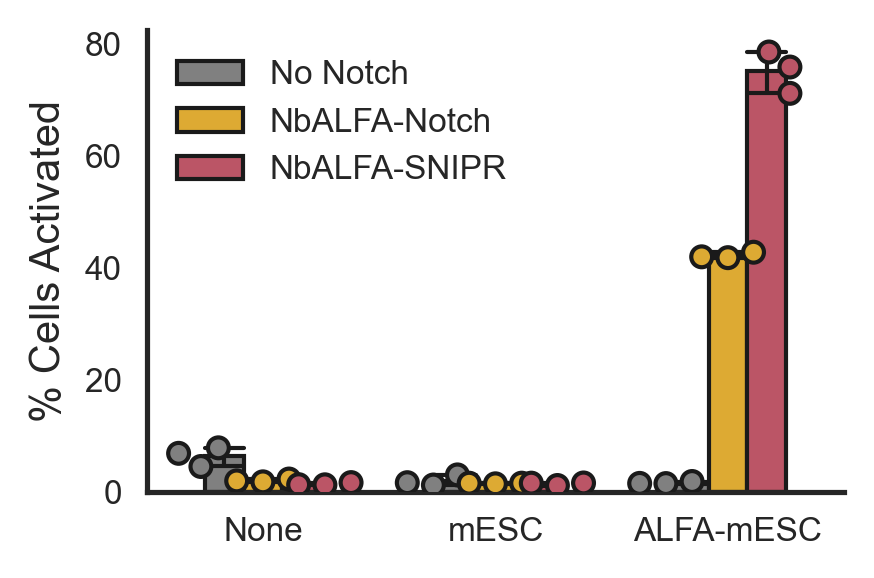

In [13]:
notches = ['No Notch','NbALFA-Notch','NbALFA-SNIPR']
with sns.color_palette(['gray', '#ddaa33', '#bb5566']):
    fig, ax = plt.subplots(1,1,figsize=(3,2), dpi=300)
    g = sns.swarmplot(data=df_summary, x='Sender', y='logDAPI-A', hue='Receiver',
                  order=['None','mESC','ALFA-mESC'],
                  hue_order=notches, 
                  edgecolor='k', linewidth=1, dodge=True, legend=False)
    sns.barplot(data=df_summary, x='Sender', y='logDAPI-A', hue='Receiver',
                  order=['None','mESC','ALFA-mESC'],
                  hue_order=notches, 
            dodge=True, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean',
            err_kws={'linewidth': 1, 'color':'k'})
    #g.legend().remove()
    plt.legend(frameon=False)
    g.set_ylabel('% Cells Activated')
    g.set_xlabel('')
    #plt.xticks(rotation=0, ha='right')
    sns.despine()
    plt.savefig(outputdir+'synnotch_activation.pdf', bbox_inches='tight')